In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline

params = {'legend.fontsize': 12,
          'figure.figsize': (10, 10),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params) 

from sympy.solvers import solve

from sympy import Symbol, Function, nsolve 

Una de las construcciones de filtro de pasa-banda de primer orden más simples se muestra aquí en la Figura. 
En principio, solo el resonador en serie sería suficiente para el filtro pasa-banda , pero esto podría resultar en componentes poco realistas para L2 y C2. 
En principio, este problema puede evitarse mediante la inclusión de redes de coincidencia L de entrada y salida como se muestra, permitiendo así que el nivel de impedancia interna dentro del filtro sea arbitrario. 
El uso de un solo resonador junto con redes simples de coincidencia L limita esta topología a aplicaciones de ancho de banda relativamente estrecho. 

![ex 2.13](fig/fig14.png)

Suponiendo que la impedancia de la fuente está representada por la $R_s$ y la impedancia de carga está representada por la $R_l$ en el contexto de la Figura \ref{fig:14}, el capacitor $C_1$ se emplea junto con  $L_1$  y está dada por 


$$C_1 = \frac{1}{\omega_o R_s}\sqrt{\frac{R_s}{R_i}-1}$$


donde $\omega_o$ central de filtro es una elección de diseño clave que se analizara más adelante. 

Es sencillo demostrar que el inductor $L_1$ viene dado por a partir del igualar los Q  

$$L_1 = \frac{R_s^2 C_1}{1+(\omega_o R_s C_1)^2} = R_s R_i C_1$$

Resultados similares se aplican a la red de coincidencia L de salida como 

$$C_3 = \frac{1}{\omega_o R_l}\sqrt{\frac{R_l}{R_i}-1}$$

$$L_3 = \frac{R_l^2 C_3}{1+(\omega_o R_l C_3)^2}  = R_i R_l C_3$$

Suponiendo que el factor de calidad deseado para el resonador en serie está representado por $Q_{res}$, el nivel de resistencia interna viene dado por  

$$R_i = \frac{\omega_l^2 L_2}{Q_r}$$

Entonces, la inductancia total de la serie viene dada por 

$$L_s = L_1 + L_2 + L_3 = \frac{R_i}{\omega_c} \sqrt{\frac{R_s}{R_i}-1}+ \frac{Q_r R_i}{\omega_c} +\frac{R_i}{\omega_c} sqrt{\frac{R_l}{R_i}-1}$$

En el caso habitual donde $R_s = R_l$, el calculo de $L_s$ se puede simplificar a 

$$L_s =  2 \frac{R_i}{\omega_c} \sqrt{\frac{R_s}{R_i}-1}+ \frac{Q_r R_i}{\omega_c}$$

Para poder implementar un filtro sintonizable, solo los capacitores de la Figura deben ser ajustables y la inductancia serie L debe fijarse en el rango de interés de sintonía de frecuencia central. 
En consecuencia, (\ref{eq:27}) puede usarse para determinar $R_i$ con el fin de mantener a $L$ serie como una constante. Después de un procesamiento algebraico, (\ref{eq:27}) puede escribirse como  

$$R_i^2 (\frac{4+Q_r^2}{\omega_c} )-R_i (\frac{2Q_r L_s}{\omega_c}+\frac{4R_s}{\omega_c^2} )+L_s^2 = 0$$

Dado que el diseño requiere que $L_s$  sea constante en todo el rango de sintonización de frecuencia, idealmente la derivada de (\ref{eq:27}) igualada a cero debería ser en todo el rango de sintonía de interés. 
Sin embargo, no existe una solución, a menos que $R_i$ pueda cambiar con la frecuencia central . 


Suponga que el rango de sintonía en frecuencia deseado es de $80 MHz$ a $120 MHz$ y  se desea $Q_r= 14$. 
Bajo este supuesto, eligiendo $L_s = 280 nH$ usando


$$L_s = L_1 + L_2 + L_3 = \frac{R_i}{\omega_c} \sqrt{\frac{R_s}{R_i}-1}+  \frac{1}{(\frac{1}{Q_r} - \frac{1}{Q_o})} \frac{R_i}{2\omega_c} +\frac{R_i}{\omega_c} \sqrt{\frac{R_l}{R_i}-1} $$





In [4]:
def calcRi(wo,Ls,rs,rl,Qr,Qo= 1000):
    ri  = Symbol('ri')

    fri = ri/wo*(rs/ri-1)**(1/2) + ri/2/wo/(1/Qr-1/Qo) + ri/wo * (rl/ri-1)**(1/2) - Ls  
    ris = solve( fri  , ri)
    #print(ris)
    r   = [r  for r in ris if r>0 ][0] 
    return r

def calcC(ri, wo,Ls,rs,rl,Qr):
    Qm1 = (rs/ri-1)**(1/2)
    C1  = Qm1/wo/rs

    Qm3 = (rl/ri-1)**(1/2)
    C3  = Qm3/wo/rl

    C1s = C1*(1+1/Qm1**2)
    C3s = C3*(1+1/Qm3**2)
    
    Cs  = 1/(Ls*wo**2)
    C2  = 1/(1/Cs - 1/C1s -1/C3s) 
    return C1,C2,C3


def Av(w,rs,C1,C2,C3,Ls,rl,Qo):
    yl = (1/rl)+(w*C3)*1j
    zl = 1/yl
    z1 = ((w*Ls)/Qo)+(w*Ls*1j)+1/(w*C2*1j)+zl
    yi = 1/z1+(w*C1*1j)
    zi = 1/yi    
    return (abs((zi/(rs+zi))*(zl/z1)))


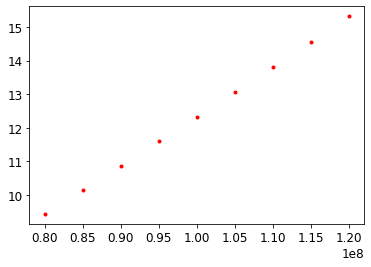

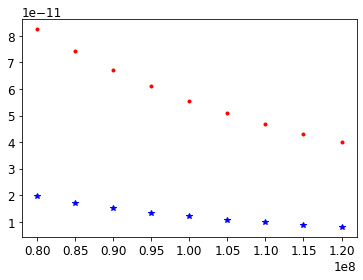

In [5]:
fo = 100e6 
wo = 2*np.pi*fo
Ls = 280e-9
rs = 50
rl = 50
Qr = 14
Qo= 40  


freq = np.arange(80e6,125e6,5e6)


for f in freq:
    r = calcRi(2*np.pi*f,Ls,rs,rl,Qr,Qo)
    plt.plot(f,r,'r.')
plt.show()

for f in freq:
    r = calcRi(2*np.pi*f,Ls,rs,rl,Qr,Qo)  
    C1,C2,C3  = calcC(r,2*np.pi*f,Ls,rs,rl,Qr)
    #print(f, r, C1, C2)
    
    plt.plot(f,C1,'r.')
    plt.plot(f,C2,'b*')
plt.show()    

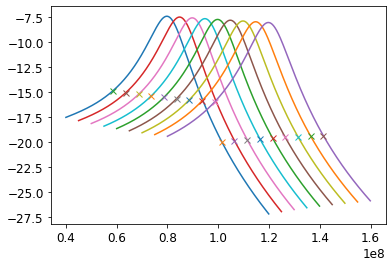

In [6]:
df = np.arange(-40e6,40e6,0.1e6)

rif = 10  

for f in freq:

    C1,C2,C3  = calcC(rif,2*np.pi*f,Ls,rs,rl,Qr)
    #print(C1,C2)
    plt.plot(f+df,20*np.log10([Av((fi+f)*2*np.pi,rs,C1,C2,C3,Ls,rl,Qo) for fi in df]))
    plt.plot(f+2*10.7e6,20*np.log10(Av((2*10.7e6+f)*2*np.pi,rs,C1,C2,C3,Ls,rl,Qo)),'x')
    plt.plot(f-2*10.7e6,20*np.log10(Av((-2*10.7e6+f)*2*np.pi,rs,C1,C2,C3,Ls,rl,Qo)),'x')
    
#plt.xlim([600e3,1400e3])
#plt.ylim([-30,-8])
plt.show()    

In [7]:
print('.param rs =  {:2.1f} '.format(rs) )
print('.param rl =  {:2.1f} '.format(rl) )

print('.param Ls  =  {:3.2f}n'.format(Ls/1e-9) )

print('.param C1 =  {:3.3f}p'.format(C1/1e-12) )
print('.param C2 =  {:3.3f}p'.format(C2/1e-12) )
print('.param C3 =  {:3.3f}p'.format(C3/1e-12) )

.param rs =  50.0 
.param rl =  50.0 
.param Ls  =  280.00n
.param C1 =  53.052p
.param C2 =  7.751p
.param C3 =  53.052p
